<a href="https://colab.research.google.com/github/am5521/am5521/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D0%BD%D0%BB%D0%B0%D0%B9%D0%BD_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импортируем нужные библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns




In [ ]:
# читаем данные из csv
url = 'https://github.com/am5521/diplom/blob/main/ecommerce-data.zip?raw=true'
df = pd.read_csv(url, encoding='ISO-8859-1', compression='zip')

##Основные сведения о датафрейме

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
df.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#Исследование данных 

In [ ]:
# посчитаем, сколько пропусков в каждой строке
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df[df.isin(["NA","NaN","Na","na","N/A",
                "n/a","missing","MISSING",
                "no data","nodata","","?",
                "??","???","????","?????"]).any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,NaN,United Kingdom
21518,538090,20956,?,-723,12/9/2010 14:48,0.0,NaN,United Kingdom
38261,539494,21479,?,752,12/20/2010 10:36,0.0,NaN,United Kingdom
43662,540100,22837,?,-106,1/4/2011 16:53,0.0,NaN,United Kingdom
50806,540558,21258,?,-29,1/10/2011 10:04,0.0,NaN,United Kingdom
51673,540651,82599,?,-290,1/10/2011 15:00,0.0,NaN,United Kingdom
68920,541882,48185,?,-57,1/24/2011 10:54,0.0,NaN,United Kingdom
78235,542861,47591B,?,-207,2/1/2011 11:47,0.0,NaN,United Kingdom
94765,544410,84997C,?,-741,2/18/2011 13:54,0.0,NaN,United Kingdom
97643,544649,21621,?,-400,2/22/2011 12:37,0.0,NaN,United Kingdom


In [ ]:
df[df.isin(["NA","NaN","Na","na","N/A",
                "n/a","missing","MISSING",
                "no data","nodata","","?",
                "??","???","????","?????"]).any(axis=1)].tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
395168,571024,22812,?,-270,10/13/2011 12:18,0.0,NaN,United Kingdom
397026,571116,23131,?,-49,10/13/2011 17:46,0.0,NaN,United Kingdom
397225,571126,72802A,?,-50,10/14/2011 9:53,0.0,NaN,United Kingdom
418129,572701,85078,missing,-840,10/25/2011 14:31,0.0,NaN,United Kingdom
418130,572702,37479P,??,-184,10/25/2011 14:33,0.0,NaN,United Kingdom
418840,572749,22572,??,-335,10/25/2011 16:52,0.0,NaN,United Kingdom
421093,572920,72803A,?,117,10/26/2011 16:52,0.0,NaN,United Kingdom
455407,575615,82582,??,-130,11/10/2011 12:51,0.0,NaN,United Kingdom
524370,580547,21201,???,-390,12/5/2011 9:29,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


 Мы видим, что, когда отсутствуют значения для Description: UnitPrice равно 0, CustomerID отсутствует, и встречаются отрицательные значения для Quantity.

Продолжим  исследование с нулевой цены за единицу:

##Очистка данных

###Нулевая цена

In [ ]:
df["UnitPrice"].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
#посчитаем сколько строк содержит нулевое значение цены
df[df["UnitPrice"] == 0].shape

(2515, 8)

Выручка зависит от количества продаж и цены за единицу товара, мы можем исключить записи, где UnitPrice равно 0.



In [ ]:
#исключаем значения с нулевой ценой
df = df[df["UnitPrice"] != 0]

In [ ]:
#смотрим результат
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132605
Country             0
dtype: int64

###Незаполненные значения в CustomerID

In [ ]:
# посчитаем, сколько пропусков 
df[df['CustomerID'].isnull()].shape

(132605, 8)

In [ ]:
# посчитаем, какой процент пропусков
df.isnull().mean() * 100

InvoiceNo       0.00000
StockCode       0.00000
Description     0.00000
Quantity        0.00000
InvoiceDate     0.00000
UnitPrice       0.00000
CustomerID     24.58407
Country         0.00000
dtype: float64

In [ ]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
# оставляем данные только с заполненным id пользователя  
df = df[df['CustomerID'].notnull()]

In [ ]:
# проверим, остались ли пропуски
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

###Избавимся от дубликатов в данных

In [ ]:
# посмотрим, сколько у нас повторов
df.duplicated().sum()

5225

In [ ]:
# сколько всего строк?
df.shape

(406789, 8)

In [ ]:
# удалим повторы
df.drop_duplicates(inplace=True)


In [ ]:
df.shape

(401564, 8)

###Отрицательное количество

In [ ]:
#посчитаем сколько строк содержит отрицательное количество товара
df[df['Quantity'] < 0].shape

(8872, 8)

In [ ]:
df[df['Quantity'] < 0].sort_values(by='Quantity').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,4/18/2011 13:08,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,4/18/2011 13:08,1.85,15749.0,United Kingdom


In [ ]:
#посчитаем сколько InvoiceNo с пометкой С (кредитный)
df[df["InvoiceNo"].str.startswith("C")].shape

(8872, 8)

Скорее всего таким образом в системе отмечались возвраты или отмненные заказы. Поскольку акцент в исследовании на базе клиентов и их покупках, можно удалить отмененные заказы.

In [ ]:
#удаляем отменнные заказы
df = df[df['Quantity'] > 0]

In [ ]:
df[df['Quantity'] < 0].shape

(0, 8)

###Поправим типы данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
df['CustomerID'] = df['CustomerID'].astype('int64')

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


###Выбросы

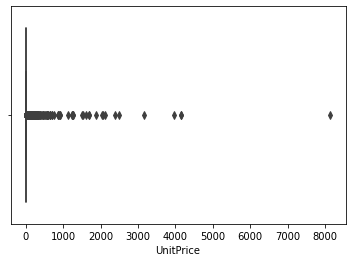

In [ ]:
sns.boxplot(x=df['UnitPrice'])

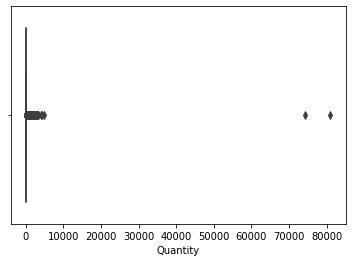

In [ ]:
sns.boxplot(x=df['Quantity'])

##Поизучаем статистику в разрезе стран

In [ ]:
# считаем сколько транзакций было по странам при помощи value_counts
df['Country'].value_counts()

In [ ]:
# считаем сколько уникальных пользователей в странах
# вычисляя затем агрегированные показатели в каждой группе.
countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
countries

##Поизучаем показатели выручки

In [ ]:
# создадим новый столбец
df['Revenue'] = df['Quantity'] * df['UnitPrice']
# добавим месяц покупки в новый столбец при помощи dt.strftime('%Y - %m')
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m') 
df.head() 

In [ ]:
# выручка по месяцам
df.groupby('InvoiceMonth')['Revenue'].sum().plot(kind='bar')
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Доход')

In [ ]:
# уникальные покупатели по месяцам
df.groupby('InvoiceMonth')['CustomerID'].nunique().plot(kind='bar')
plt.title('Распределение покупателей по месяца')
plt.xlabel('Месяц')
plt.ylabel('Количество покупателей')

##Изучим статистику в разрезе клиентов

In [ ]:
# изучим сводную статистику по покупателям из произвольной страны (суммарная и средняя выручка)
products = df[df.Country=='United Kingdom'].groupby(['CustomerID', 'InvoiceNo'], as_index=False)['Revenue'].sum()
products = products.groupby(by='CustomerID').agg({'InvoiceNo': ['count'], 'Revenue': ['sum','mean']})
products

###Топ-5 лояльных покупателей

In [ ]:
df_pokupateli = df.copy()
# посчитаем количество транзакций в разрезе покупателей
df_pokupateli = df_pokupateli.groupby('CustomerID')['InvoiceNo'].nunique()
# отсортируем данные
df_pokupateli.sort_values(ascending=False, inplace=True)
df_pokupateli.head(5)

##Сегменты товаров по стоимости

In [ ]:
# напишем функцию для сегментации товаров
def price_segment(row):
    if row < 5:
        return 'cheap' 
    if row >= 5 and row < 100:
        return 'middle'
    if row >= 100:
        return 'expensive'
 

df['PriceSegment'] = df[df.Quantity > 0]['UnitPrice'].apply(price_segment)
# df.groupby('PriceSegment')['StockCode'].nunique()
df.groupby('PriceSegment')['StockCode'].count()